In [22]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_데이터.xlsx")
df

,정류소아이디,버스개수,배차간격,이용자수,거주인구,근무인구,방문인구,학교수,교사수,학생수,주당수업시수,종속변수
0,1,3.044944,36.882022,46.207865,1.424681e+05,19097.655444,144384.736747,2,97,1083,688,15.175277
1,6,4.561265,47.786561,69.972332,1.187076e+06,112441.264996,458597.838130,10,641,9283,620,15.340555
2,7,3.385185,44.962963,99.696296,1.189324e+06,111493.669348,455381.134741,10,641,9283,620,29.450766
3,8,1.000000,47.500000,129.500000,1.058966e+06,84274.863500,514853.693500,10,641,9283,620,129.500000
4,9,6.505774,48.845266,65.667436,1.188479e+06,111958.761651,455749.051640,10,641,9283,620,10.093717
...,...,...,...,...,...,...,...,...,...,...,...,...
614,4290,1.000000,77.500000,42.222222,8.236243e+05,89305.849000,295616.037222,10,630,9754,999,42.222222
615,4298,1.111111,50.000000,68.333333,7.490121e+05,71571.872889,435507.351111,17,450,4273,330,61.500000
616,4306,2.000000,37.500000,16.000000,9.772078e+04,9562.514000,71327.365500,2,90,209,267,8.000000
617,4371,1.831461,30.000000,17.292135,7.586625e+05,67321.041191,447471.915404,17,450,4273,330,9.441718


In [23]:
df1 = df[['버스개수','배차간격','이용자수']]
df1

,버스개수,배차간격,이용자수
0,3.044944,36.882022,46.207865
1,4.561265,47.786561,69.972332
2,3.385185,44.962963,99.696296
3,1.000000,47.500000,129.500000
4,6.505774,48.845266,65.667436
...,...,...,...
614,1.000000,77.500000,42.222222
615,1.111111,50.000000,68.333333
616,2.000000,37.500000,16.000000
617,1.831461,30.000000,17.292135


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1_scaled = sc.fit_transform(df1)
df1_scaled_df = pd.DataFrame(df1_scaled, columns=df1.columns)
df_c = df1_scaled_df.dropna()
df_c

,버스개수,배차간격,이용자수
0,-0.113913,-0.901197,-0.226036
1,0.140943,-0.173256,0.199941
2,-0.056727,-0.361748,0.732741
3,-0.457616,-0.192386,1.266971
4,0.467766,-0.102582,0.122776
...,...,...,...
614,-0.457616,1.810286,-0.297478
615,-0.438941,-0.025497,0.170562
616,-0.289541,-0.859943,-0.767510
617,-0.317868,-1.360611,-0.744349


In [25]:
# 표준화 확인
print("\n평균:")
print(df_c.mean())
print("\n표준편차:")
print(df_c.std())


평균:
버스개수   -4.591552e-17
배차간격   -2.754931e-16
이용자수    1.147888e-17
dtype: float64

표준편차:
버스개수    1.000809
배차간격    1.000809
이용자수    1.000809
dtype: float64


C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

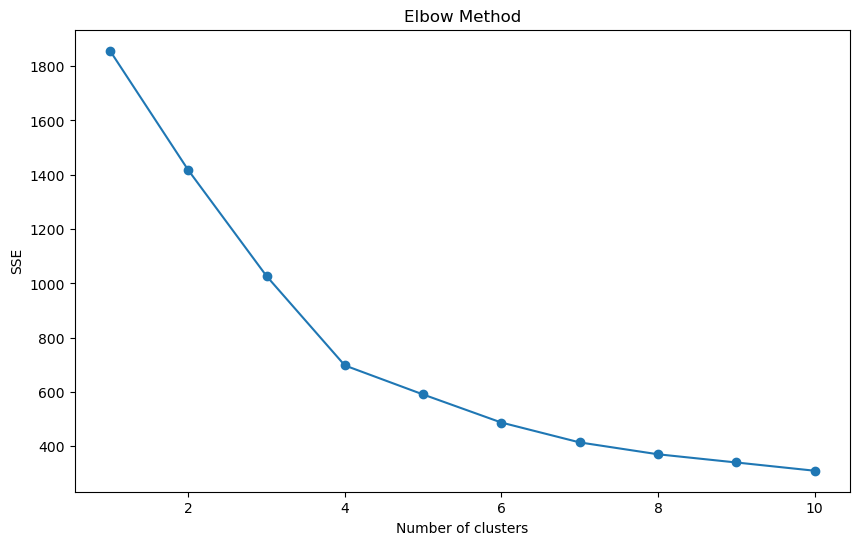

In [26]:
# Elbow Method 적용하여 최적의 클러스터 수 찾기
sse = []
for i in range(1, 11):  # 클러스터 수를 1에서 10까지 시도
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)  # 각 클러스터 수에 대한 SSE 저장

# SSE 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

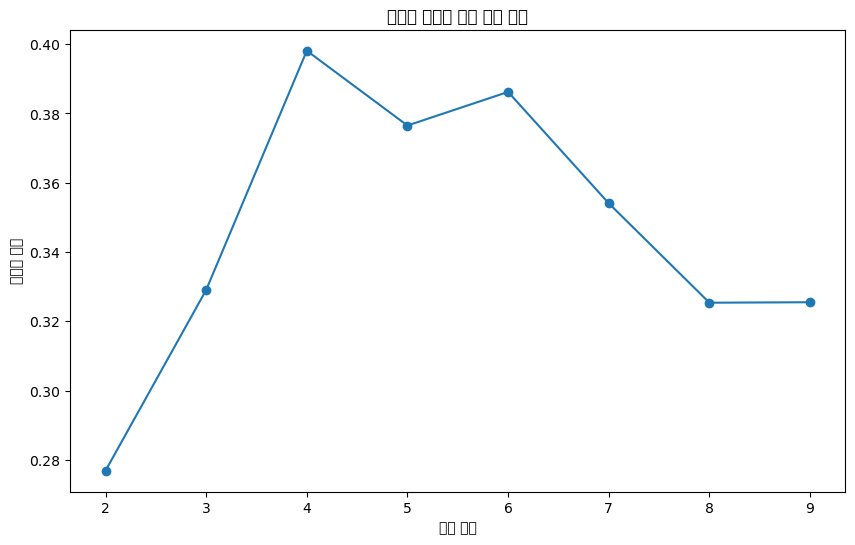

In [27]:
from sklearn.metrics import silhouette_score 

# 군집 개수별로 실루엣 계수 계산
silhouette_coefficients = []
for i in range(2, 10):  # 실루엣 계수는 최소 2개의 클러스터가 필요
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_c)
    score = silhouette_score(df_c, kmeans.labels_)
    silhouette_coefficients.append(score)

# 실루엣 계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_coefficients, marker='o')
plt.title('실루엣 계수에 따른 군집 개수')
plt.xlabel('군집 개수')
plt.ylabel('실루엣 계수')
plt.show()

In [28]:
kmeans=KMeans(n_clusters = 4, random_state = 0,init='k-means++')
clusters = kmeans.fit(df_c)

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [29]:
#클러스터링 품질 측정 : 실루엣 계수 측정
silhouette_avg = silhouette_score(df_c, clusters.labels_)
print(f'클러스터링의 실루엣 계수: {silhouette_avg}')

클러스터링의 실루엣 계수: 0.3981164731326448


In [30]:
df_c['cluster'] = clusters.labels_
df_c.groupby('cluster').count()

,버스개수,배차간격,이용자수
cluster,,,
0,201,201,201
1,303,303,303
2,81,81,81
3,34,34,34


In [31]:
df_c.groupby('cluster').mean()

,버스개수,배차간격,이용자수
cluster,,,
0,-0.259618,1.105759,-0.372698
1,-0.144638,-0.617947,-0.263246
2,-0.219301,-0.392511,2.016615
3,3.346233,-0.094894,-0.255002


Cluster 0:

버스 개수가 평균보다 약간 적은 편(-0.259618)
배차 간격이 평균보다 상당히 짧은 편(1.105759)
이용자 수가 평균보다 약간 적은 편(-0.372698)

이 군집은 버스 운행 빈도가 높은 편이지만, 전반적인 이용자 수는 평균보다 약간 적은 지역
공급은 충분한 편이지만 실제 이용률은 높지 않은 지역으로 추정

Cluster 1:

버스 개수가 평균보다 약간 적은 편(-0.144638)
배차 간격이 평균보다 약간 긴 편(-0.617947)
이용자 수가 평균보다 약간 적은 편(-0.263246)
이 군집은 버스 운행 빈도가 평균보다 낮고, 실제 이용자 수도 평균보다 약간 적은 지역임
공급과 수요가 모두 평균 수준에 미치지 못하는 지역

Cluster 2:

버스 개수가 평균보다 약간 적은 편(-0.219301)
배차 간격이 평균보다 약간 짧은 편(-0.392511)
이용자 수가 평균보다 상당히 많은 편(2.016615)
이 군집은 버스 운행 빈도가 평균보다 약간 높고, 실제 이용자 수가 평균을 크게 상회하는 지역임
상대적으로 버스 서비스가 잘 갖춰져 있고 이용률도 높은 지역으로 추정

Cluster 3:

버스 개수가 평균보다 상당히 많은 편(3.346233)
배차 간격이 평균보다 약간 짧은 편(-0.094894)
이용자 수가 평균보다 약간 적은 편(-0.255002)
이 군집은 버스 공급이 매우 많은 편이지만, 실제 이용자 수는 평균보다 약간 적은 지역임
버스 서비스가 과잉 공급된 것으로 보이며, 이용률이 상대적으로 낮은 지역일 가능성이 있음



In [32]:
from sklearn.decomposition import PCA
X = df_c.copy()

pca = PCA(n_components = 2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 0.39756661, -0.12110903],
       [ 0.28979042, -0.03445293],
       [ 0.54934882, -0.53965798],
       ...,
       [ 0.06359719,  0.07052771],
       [ 0.33750176, -0.06177407],
       [-1.6614533 ,  0.34846188]])

In [33]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df_c['cluster']
pca_df.head()

,0,1,cluster
0,0.397567,-0.121109,1
1,0.289790,-0.034453,1
2,0.549349,-0.539658,1
3,1.110813,-1.044038,2
4,0.349365,0.278975,1


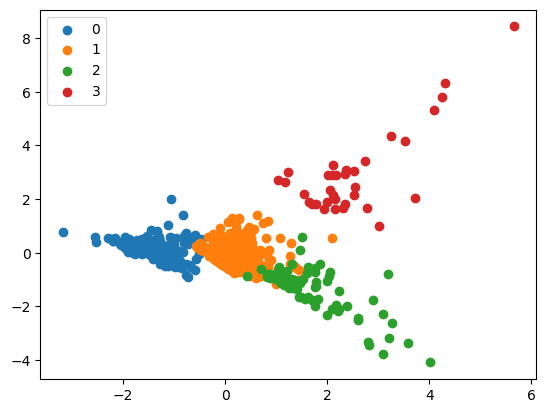

In [34]:
for i in sorted(pca_df['cluster'].unique()):
        tmp = pca_df.loc[pca_df['cluster']==i]
        plt.scatter(tmp[0],tmp[1])
        plt.legend(sorted(pca_df['cluster'].unique()))

In [36]:
c_join = pd.concat([df_c,df], axis = 1)
c_join = c_join[['정류소아이디','cluster']]
c_join

c_join.to_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_버스.xlsx",index=False)
